In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("economic_index.csv")

In [8]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [10]:
df.drop(columns=["Unnamed: 0","year","month"], axis = 1, inplace= True)

In [12]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [14]:
## check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

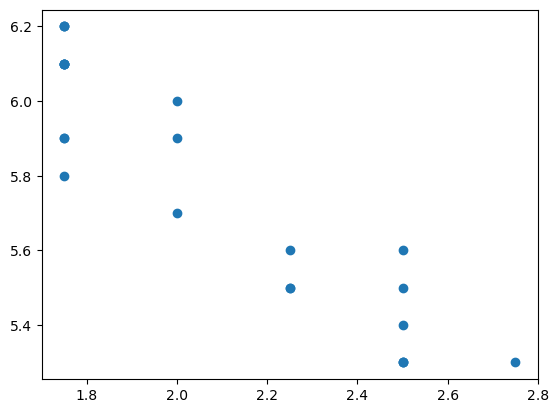

In [16]:
## Visualization
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.show()

In [18]:
## Independent And Dependent Features
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [20]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [22]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [12]:
## Train Test split

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
## Training of model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [32]:
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
## Predictions calculations
y_pred = regression.predict(X_test)

In [36]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [38]:
## Score of our model
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [40]:
score

0.8278978091457142

In [22]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

5793.76288771258
59.93578152323556
76.11677139574813


In [42]:
## Model Pickling

In [44]:
import pickle

In [46]:
regression

LinearRegression()

In [52]:
pickle.dump(regression,open('regression.pkl','wb'))

In [54]:
## Using our pickle file

In [56]:
model = pickle.load(open('regression.pkl','rb'))

In [58]:
model.predict(X_test)

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])